Задание 3. Задача оптимального выбора потребителя 

Функция полезности потребителя для двух товаров имеет вид U = U(x, y), где x, y<br>
– количества приобретаемых товаров.<br>
1. Определите максимальную полезность и оптимальный набор товаров, если доход<br>
потребителя – I ден.ед., а цены товаров – p, q ден.ед. соответственно.

In [1]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint, Bounds
import sympy as sym

In [2]:
xs, ys = sym.symbols('x y')
U = 3 * xs * (ys - 7) ** 0.75

In [3]:
U

3*x*(y - 7)**0.75

In [4]:
p = int(input('p = '))
q = int(input('q = '))
I = int(input('I = '))

p = 2
q = 19
I = 2070


In [5]:
def con(xy):
    x, y = xy
    return f'px + qy = {(p*x + q*y).round(3)}, I = {I}.'

In [6]:
def f(xy):
    x, y = xy
    return -(3 * x * (y - 7) ** 0.75)

In [7]:
def gr(xy):
    x, y = xy
    
    der = np.zeros_like(xy)
    der[0] = -eval(str(U.diff(xs)))
    der[1] = -eval(str(U.diff(ys)))
    
    return der

In [8]:
print('Предельная полезность MUx (dU/dx):')
display(U.diff(xs))
print('Предельная полезность MUy (dU/dy):')
display(U.diff(ys))

Предельная полезность MUx (dU/dx):


3*(y - 7)**0.75

Предельная полезность MUy (dU/dy):


2.25*x/(y - 7)**0.25

In [9]:
x_min = 1
y_min = 7
x_max = np.inf
y_max = np.inf

linear_constraint = LinearConstraint ([p, q], -np.inf, I)
bounds = Bounds([x_min, y_min], [x_max, y_max])
x0 = np.array([10.0, 10.0])
res = minimize(f, x0, jac=gr, constraints=linear_constraint, bounds=bounds, options={'disp': True})

u = res.x[0]
v = res.x[1]

print(res.x)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -28215.143084278585
            Iterations: 12
            Function evaluations: 22
            Gradient evaluations: 11
[553.42857147  50.69172933]


In [10]:
print(f'Оптимальные значения: x = {u}, y = {v}')
print('Max значение функции:',-res.fun)
print(con(res.x))

Оптимальные значения: x = 553.428571465459, y = 50.69172932721793
Max значение функции: 28215.143084278585
px + qy = 2070.0, I = 2070.


2. Постройте график функции полезности.

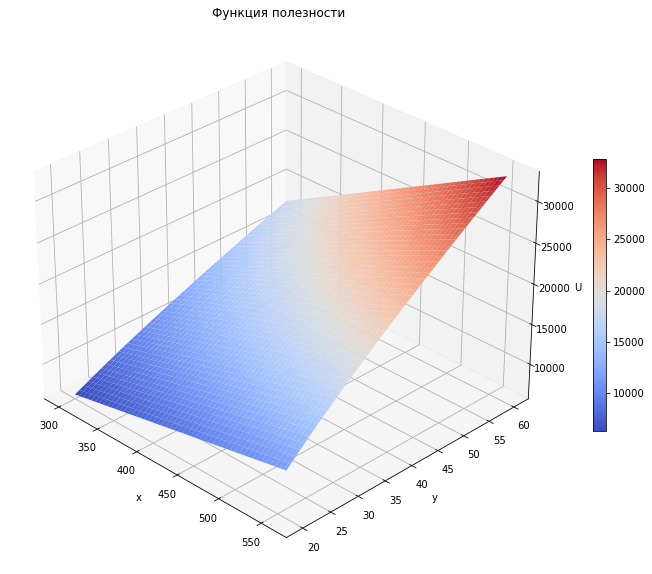

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Настраиваем 3D график
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={"projection": "3d"})

# Задаем угол обзора
ax.view_init(30, -45)

# Создаем данные для графика

X = np.linspace(300, 560, 100)
Y = np.linspace(20, 60, 200)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

# Рисуем поверхность
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5)
ax.set_title('Функция полезности')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('U')
plt.show()

3. Изобразите допустимое множество, кривые безразличия и оптимальную точку.

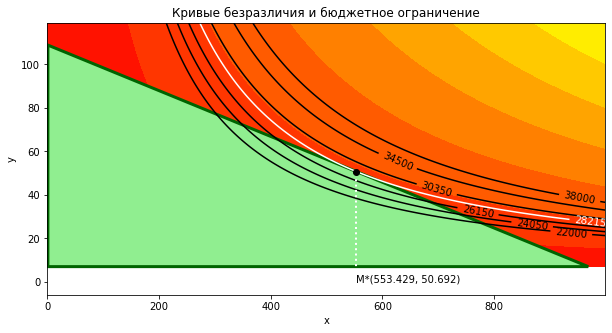

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

X = np.arange(0, 1000, 1)
Y = np.arange(7, 120, 1)
X, Y = np.meshgrid(X, Y)
Z = -f(np.array([X,Y]))

ax.contourf(X, Y, Z, cmap='autumn')

adm = plt.Polygon([(x_min,y_min),(x_min, I/q-p*x_min/q),(I/p-q*y_min/p, y_min)], facecolor='lightgreen', edgecolor='darkgreen', alpha = 1, linewidth=3)
ax.add_patch(adm)

ax.set_title('Кривые безразличия и бюджетное ограничение')
ax.set_xlabel('x')
ax.set_ylabel('y')

cs_m = ax.contour(X, Y, Z, levels=[-res.fun], colors='white')
cs = ax.contour(X, Y, Z, levels=[22000,24050,26150,30350,34500,38000], colors='black')

plt.vlines(x=u, ymin=0, ymax=v, colors='white', ls=':', lw=2)
ax.plot(u, v, 'ko')
ax.text(res.x[0], 0, f'M*({u.round(3)}, {v.round(3)})')

ax.clabel(cs)
ax.clabel(cs_m)

plt.show()

4. Найдите уравнение кривой безразличия, на которой находится потребитель в оптимальной точке.

In [13]:
F = sym.Eq(U, -res.fun)

In [14]:
F

Eq(3*x*(y - 7)**0.75, 28215.1430842786)

5. Определите норму замены второго товара первым в оптимальной точке.

In [15]:
grad = gr(res.x)
MRS = grad[0] / grad[1]
print('Норма замены второго товара первым MRS =', MRS)

Норма замены второго товара первым MRS = 0.10526315789713998


6. Найдите функцию спроса для первого товара и постройте ее график.

In [16]:
def demand(p):
    return 7748/(7*p)

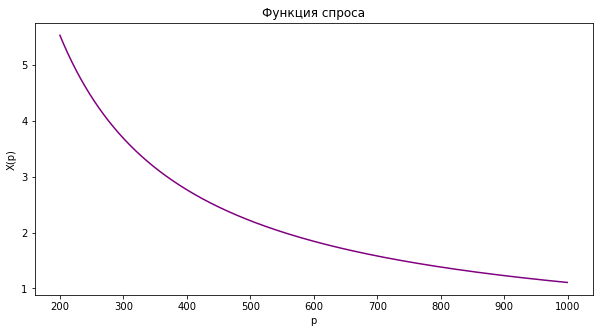

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

P = np.arange(200, 1000, 1)
X = demand(P)
ax.plot(P, X, color='purple')
ax.set_title('Функция спроса')
ax.set_xlabel('p')
ax.set_ylabel('X(p)')

plt.show()

7. Определите эластичность спроса на первый товар по цене.

In [18]:
ps = sym.symbols('p')
E = eval(str(demand(ps).diff(ps)))
print('Эластичность спроса E =', E)

Эластичность спроса E = -276.7142857142857
